### MediAid-AI Prototype Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load Dataset
df = pd.read_csv("medi_aid_synthetic.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (500, 45)
  patient_id  age  gender              region  duration_days   comorbidity  \
0      P0001   15    Male    Gilgit-Baltistan              9           NaN   
1      P0002   74    Male    Gilgit-Baltistan              3           NaN   
2      P0003   19  Female               Sindh              8  Hypertension   
3      P0004   39   Other           Islamabad             20           NaN   
4      P0005   29    Male  Khyber Pakhtunkhwa              1           NaN   

        disease                                   present_symptoms  \
0       Measles  conjunctivitis;constipation;cough;fever;rash;r...   
1   Hepatitis C  abdominal_pain;chest_pain;dark_urine;jaundice;...   
2      COVID-19  cough;fatigue;fever;shortness_of_breath;sore_t...   
3       Measles                    cough;fever;headache;runny_nose   
4  Tuberculosis     chest_pain;dark_urine;night_sweats;weight_loss   

                     recommended_tests  \
0                 IgM measles antibody   
1

In [3]:
# 2. Basic Cleaning
df.drop_duplicates(inplace=True)
df.fillna({'region': 'Unknown', 'comorbidity': 'None'}, inplace=True)

In [4]:
#Identify symptom columns (binary features)
symptom_columns = [col for col in df.columns if col not in ['patient_id','age','gender','region','duration_days','comorbidity','disease','present_symptoms','recommended_tests','recommended_medicines']]

In [5]:
# 3. Feature Selection
feature_cols = ['age','gender','region','duration_days','comorbidity'] + symptom_columns
target_col = 'disease'

In [6]:
# 4. Encoding Categorical Features
# -----------------------------
label_encoders = {}
for col in ['gender','region','comorbidity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# 5. Scaling Numerical Features
# -----------------------------
scaler = StandardScaler()
df[['age','duration_days']] = scaler.fit_transform(df[['age','duration_days']])

In [8]:
# 6. Split Data
# -----------------------------
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
# 7. Model Training
# -----------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
# -----------------------------
# 8. Evaluation
# -----------------------------
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

               COVID-19       1.00      1.00      1.00         6
             Chickenpox       1.00      1.00      1.00         9
                 Dengue       0.86      1.00      0.92         6
        Gastroenteritis       1.00      0.90      0.95        10
            Hepatitis A       1.00      0.88      0.93         8
            Hepatitis C       0.83      1.00      0.91        10
                Malaria       1.00      1.00      1.00         8
                Measles       1.00      0.89      0.94         9
              Pneumonia       0.78      1.00      0.88         7
           Tuberculosis       1.00      1.00      1.00         9
                Typhoid       1.00      0.90      0.95        10
Urinary_Tract_Infection       1.00      0.88      0.93         8

               accuracy                           0.95       100
              macro avg       0.96      0.95      0.95       10

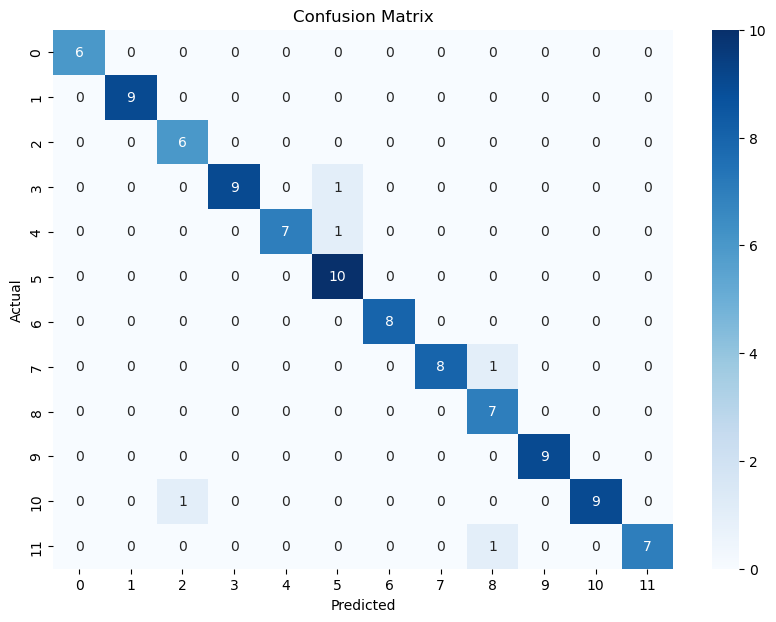

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

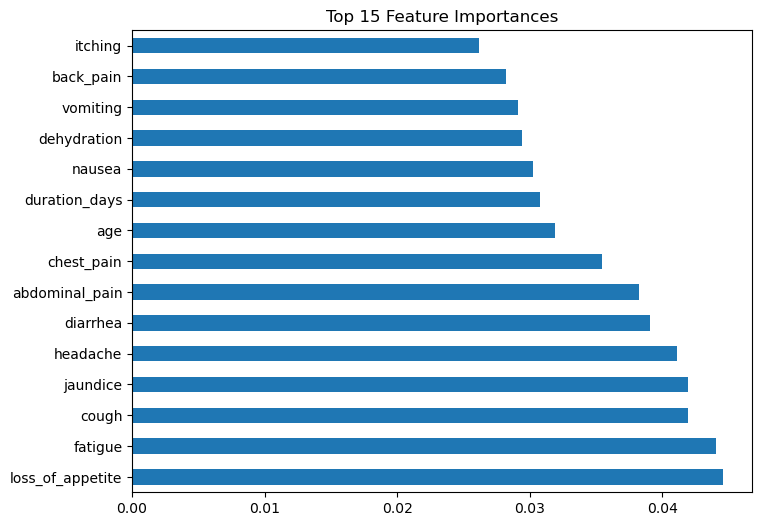

In [13]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feature_importances.head(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()

In [14]:
# 9. Save Model (Optional)
# -----------------------------
import joblib
joblib.dump(model, 'medi_aid_disease_model.pkl')
joblib.dump(label_encoders, 'medi_aid_label_encoders.pkl')
joblib.dump(scaler, 'medi_aid_scaler.pkl')


print("\n✅ Model training complete and saved successfully.")


✅ Model training complete and saved successfully.
